# **Google playstore Data**
**Complete Exploratory Data Analysis**

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## 1. Importing Libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline 

## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [128]:
df = pd.read_csv('googleplaystore.csv')

- Viewing the first five Rows of the data

In [129]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 

In [130]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

In [131]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

- let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [132]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- Let's have a look on the shape of the dataset

In [133]:
df.shape

(10841, 13)

- Not enough, let's have a look on the columns and their data types using detailed info function

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'` 

In [135]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the `Size` column first

In [136]:
# check for null values
df['Size'].isnull().sum()

0

- No null values, we are good to go.

In [137]:
# check unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

-  There are several uniques values in the `Size` column, we have to first make the unit into one common unit from M and K to bytes, and then remove the `M` and `K` from the values and convert them into numeric data type.

In [138]:
# find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [139]:
# find the values in size column which has 'k' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [140]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [141]:
# Total Values in Size column
df['Size'].value_counts().sum()

10841

In [142]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

In [143]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [144]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [145]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

In [146]:
# check the unique values in size column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', '1000+'], dtype=object)

In [147]:
# let's have a values counts
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
1000+                1
Name: count, dtype: int64

In [148]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10840

In [149]:
# Total values in Installs column
df['Installs'].value_counts().sum()

10841

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.

- The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one value 0 has no plus sign

- Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type

In [150]:
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
# also remove the commas from the install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

- Let's verify if the dtypes has been changes and the `+` and `,` sign has been removed

In [151]:
df.head() # check the head of the dataframe

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [152]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [153]:
df['Installs'].max() # this will show the value counts of the column

1000000000

- Let's create a new column named as the "Installs_category" which will contain the bins of the installs column.

In [154]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['very_low', 'low', 'medium', 'medium_high', 'high', 'very_high', 'extremely_high', 'top_notch']
df['Installs_category'] = pd.cut((df['Installs']) ,  bins= bins , labels= labels , )

- Let's have a look at the `Installs_category` column now. 

In [155]:
df['Installs_category'].value_counts()

Installs_category
medium            2162
very_high         2118
extremely_high    2004
high              1648
medium_high       1531
top_notch          828
low                535
very_low            15
Name: count, dtype: int64

### It's time to play with the `Price` column.

In [156]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [157]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

- We will check if there are any null values in the column.

In [158]:
df['Price'].isnull().sum()

0

- We will check how many values in the `Price` column have the `$` sign in it.

In [159]:
df['Price'].loc[df['Price'].str.contains("\$")].value_counts().sum()

800

In [160]:
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()


10041

- Now we can clearly see that the values in the "Price" column has only values with "$" sign or are "0".
---

- So, we will just remove the `$` sign from the "price" column.

In [161]:
# THe written below expression will remove all the "$" signs from the column. 

df['Price'] = df['Price'].apply(lambda x : x.replace("$" , "") if "$" in str(x) else x)

# THe written below expression will convert the datatype of the column into float

df['Price'] = df['Price'].apply(lambda x : float(x))

- Let's check the datatype of it.

In [162]:
df['Price'].dtype

dtype('float64')

- Let's check the maximum and the minimum values aso the mean value in the "Price" column.

In [163]:
print(f"The maximum price is : {df['Price'].max()}")

print(f"The minimum price is : {df['Price'].min()}")

print(f"THe mean price in the Price column is {df['Price'].mean()}")

The maximum price is : 400.0
The minimum price is : 0.0
THe mean price in the Price column is 1.0272733142699015


### It's time to check the descriptive status of the numeric columns.

In [164]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


## **Observations**
---
- Now we have 6 columns of the numeric datatype.
- In the `Rating` column the maximum value is `5.0` and minimum is `1.0` also the mean value is `4.19`. Also " 4.19 " is a good rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

- Therefore, it is important to classify apps based on the correlation matrix and observe the descriptive status of the App's category, number of installs, rating and reviews etc.

But before that we have to cope up with the missing values.

---


## **2.2. Dealing with the Missing Values**
- Dealing with the missing values is the most important part of the data wrangling process, In order to get the correct insights of the data, missing valeus must be addressed.

- Let's have a look on the missing values in the dataset

In [165]:
df.isnull().sum() # This function will show the all the count of null values in each column.

App                     0
Category                0
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          1
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

- Let's have a look at the heirarchy of the null values.


In [166]:
df.isnull().sum().sort_values(ascending = False)

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Content Rating          1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Genres                  0
Last Updated            0
Installs_category       0
dtype: int64

- Let's get the total number of the null values in the dataFrame 

In [167]:
print(f"The total number of null values in the dataFrame are : {df.isnull().sum().sum()}")

The total number of null values in the dataFrame are : 4876


- Now to check the percentage of the null values in the columns.


In [168]:
((df.isnull().sum() / len(df) * 100) ).sort_values(ascending = False)

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Type                  0.009224
Content Rating        0.009224
App                   0.000000
Category              0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Genres                0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

- Let's plot the heatmap of the missing values in the dataset.

<Axes: >

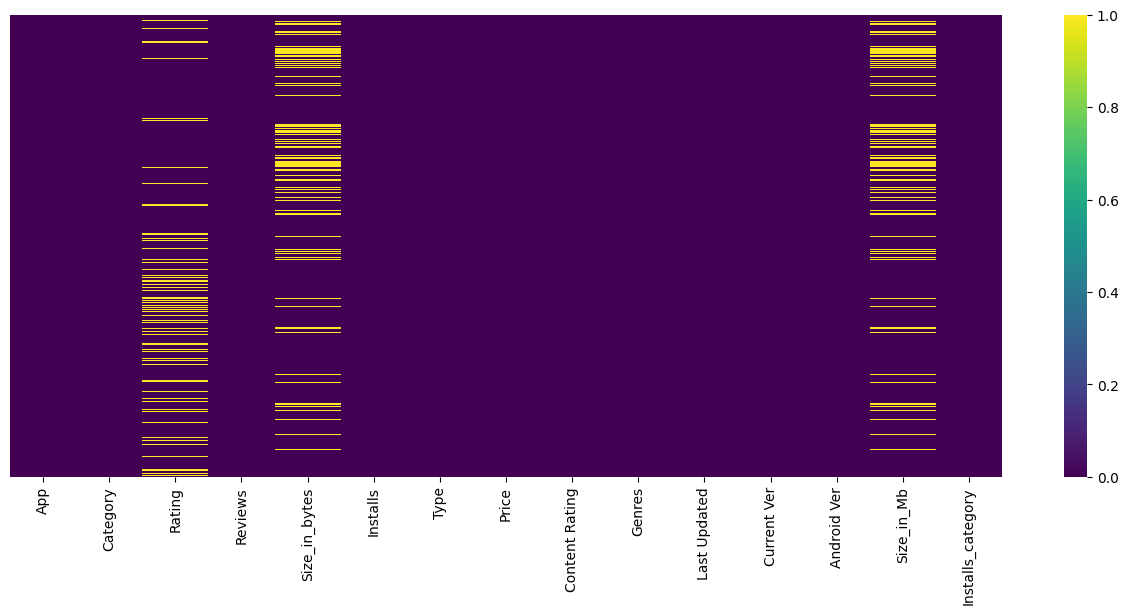

In [169]:
# This expression will create a canvas for our graph plotting...

plt.figure(figsize = (16,6))

# THis expression will plot the missing values in the dataset using the heatmap.

sns.heatmap(data = df.isnull() , yticklabels = False , cbar = True , cmap = 'viridis' )



- Let's plot the null values using the bar plot.

Text(0.5, 1.0, 'Percentageof NULL values in dataFrame.')

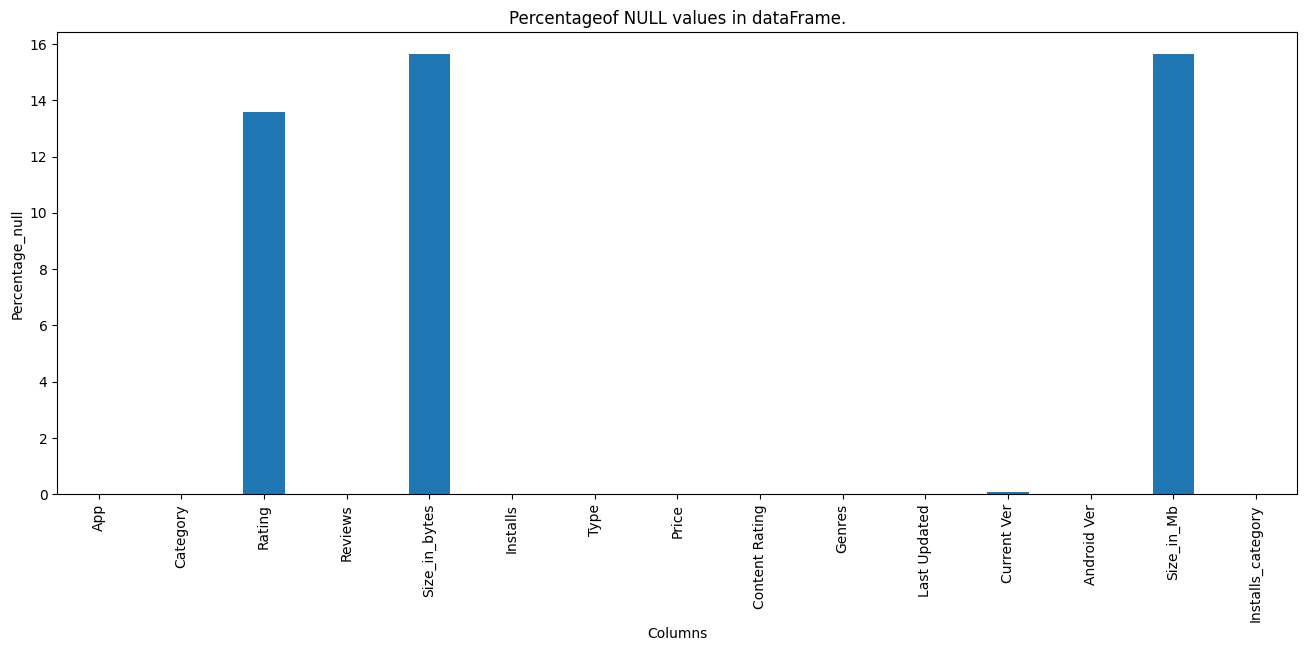

In [170]:
# make the figure size.
plt.figure(figsize = (16 , 6))

# Let's count the percentage of null values in the dataFrame.

percentage_null = df.isnull().sum() / len(df) * 100
percentage_null.plot(kind = 'bar')

# NOw we have to add the labels.

plt.xlabel("Columns")
plt.ylabel("Percentage_null")
plt.title("Percentageof NULL values in dataFrame.")


## **ISSUE** : 
- - We have many columns that have the null vallues less than 1 , so we will plot the separately.

Text(0.5, 1.0, 'Percentage of NULL values in dataFrame without the Rating column.')

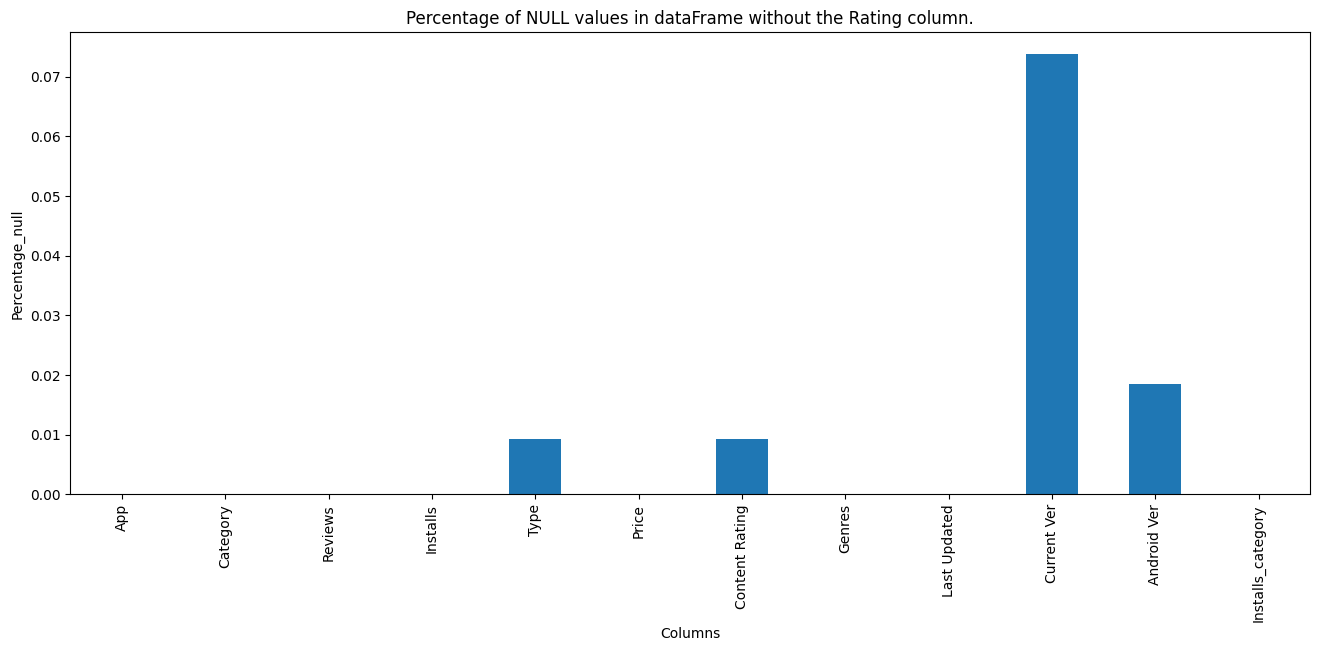

In [171]:
# Getting the canvas for the graph.
plt.figure(figsize = (16 , 6))
 # Selecting columns with percentage_null less than 1.

percentage_null[percentage_null < 1].plot(kind = "bar") 
plt.xlabel("Columns")   # labeling x-axis
plt.ylabel("Percentage_null") # labeling y-axis
plt.title("Percentage of NULL values in dataFrame without the Rating column.") # Title of plot

In [172]:
df.isnull().sum().sort_values(ascending= False)

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Content Rating          1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Genres                  0
Last Updated            0
Installs_category       0
dtype: int64

In [173]:
missing_percentage = df.isnull().sum() / len(df) * 100 
print(missing_percentage)

App                   0.000000
Category              0.000000
Rating               13.596532
Reviews               0.000000
Size_in_bytes        15.635089
Installs              0.000000
Type                  0.009224
Price                 0.000000
Content Rating        0.009224
Genres                0.000000
Last Updated          0.000000
Current Ver           0.073794
Android Ver           0.018448
Size_in_Mb           15.635089
Installs_category     0.000000
dtype: float64


## **Observations**
---

- In the `Size_in_bytes` and the `Size_in_Mbs` columns ahve the `1695` missing values which makes upto the percentage of `15.63`.
- THe `Rating` column has the `1474` missing values which makes upto the `13.59` percent of the missing values.
- `Current ver` and the `Android ver` has the `8` and `2` missing values and their percentage is `0.07` `0.018` respectively.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

 ### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Let's run the correlations

In [174]:
df.describe() # THis will tell us about the numberic columns in the dataFrame.

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

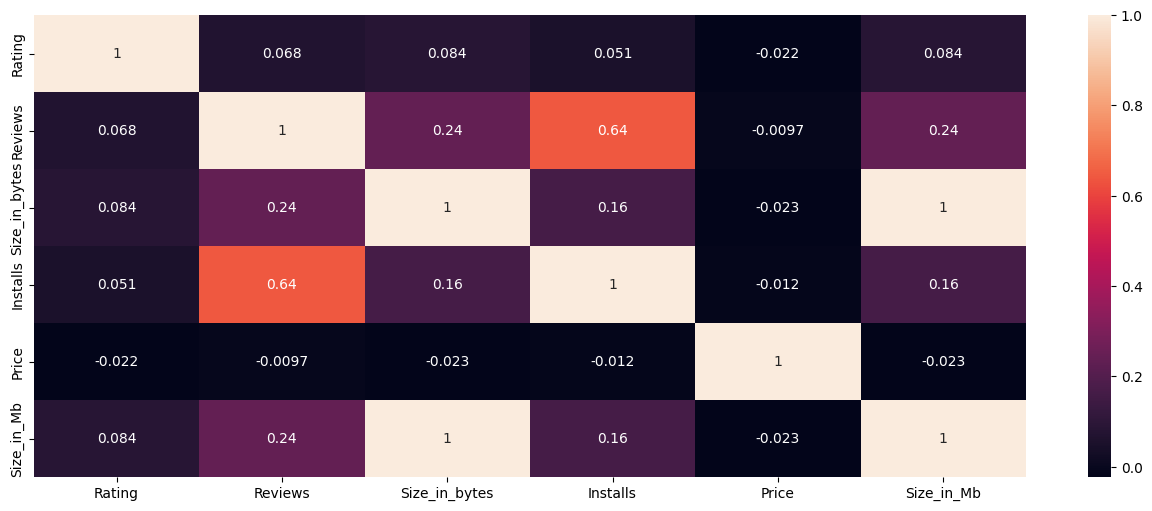

In [175]:
plt.figure(figsize= (16 , 6) )

# Create a list of all the numberic columns.

numeric_cols = ['Rating' , 'Reviews' , 'Size_in_bytes' , 'Installs' , 'Price' , 'Size_in_Mb']

# Passing the data into the columns from the dataFrame
# numeric_cols = df[numeric_cols]

# Let's plor the correlation
sns.heatmap(df[numeric_cols].corr(), annot= True)



- Let's calculate the correlation matrix of these columns. 

In [176]:

df[numeric_cols].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


- LEt's calculate the corrrelation using the scipy stats library.

In [177]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
# from scipy import stats

# # remove rows containing NaN or infinite values (Important to calculate Pearson's R)
# df_clean = df.dropna()

# # calculate Pearson's R between Rating and Installs
# pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
# print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an app with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [178]:
# THis will drop the null values from the given columns.
df.dropna(subset= ['Current Ver' , 'Category', 'Genres' , 'Android Ver' , 'Type'] , inplace= True)


In [179]:
print(f"The length of dataFrame after removing the null values is : { len(df)}")

The length of dataFrame after removing the null values is : 10830


- We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [180]:
# Let's check the null values again.

df.isnull().sum().sort_values(ascending= False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
Content Rating          1
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [181]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

- Let's look at the `Installs_category` with respect to the `Rating`.

In [182]:
df.groupby("Installs_category")["Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
very_low,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
medium,1279.0,4.169195,0.827721,1.0,3.8,4.4,4.8,5.0
medium_high,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
high,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
very_high,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
extremely_high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
top_notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


# Assignemt: Please replace the respective missing values of Rating, with respect to the average give in each 'Installs Category'!

In [183]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
medium            880
low               453
medium_high        88
high               31
very_low           14
very_high           3
extremely_high      0
top_notch           0
Name: count, dtype: int64

- LEt's fill the `Rating` values with their respective mean values in the `Installs_category`.

In [184]:
# this will give the average rating for each installs category
ave_installs_cat = df.groupby("Installs_category")["Rating"].transform('mean') 

# this will fill the null values in the 'Rating' column with the average rating for each installs category
df['Rating'] = df['Rating'].fillna(ave_installs_cat) 

- LEt's check the missing values again.

In [185]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
very_low          14
low                0
medium             0
medium_high        0
high               0
very_high          0
extremely_high     0
top_notch          0
Name: count, dtype: int64

- There are still some missing values in the very_low bin, as it has the range from `-2 , 0` we will impute it with zero. 

In [186]:
df['Rating'] = df['Rating'].fillna(0)

In [187]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
very_low          0
low               0
medium            0
medium_high       0
high              0
very_high         0
extremely_high    0
top_notch         0
Name: count, dtype: int64

##### Congrats, there aren't any missing values left in the Rating column.

In [188]:
df['Installs_category'].isnull().sum()

0

In [189]:
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
very_low          0
low               0
medium            0
medium_high       0
high              0
very_high         0
extremely_high    0
top_notch         0
Name: count, dtype: int64

- There aren't any null values in the `Reviews` column.

<Axes: xlabel='Installs_category', ylabel='Reviews'>

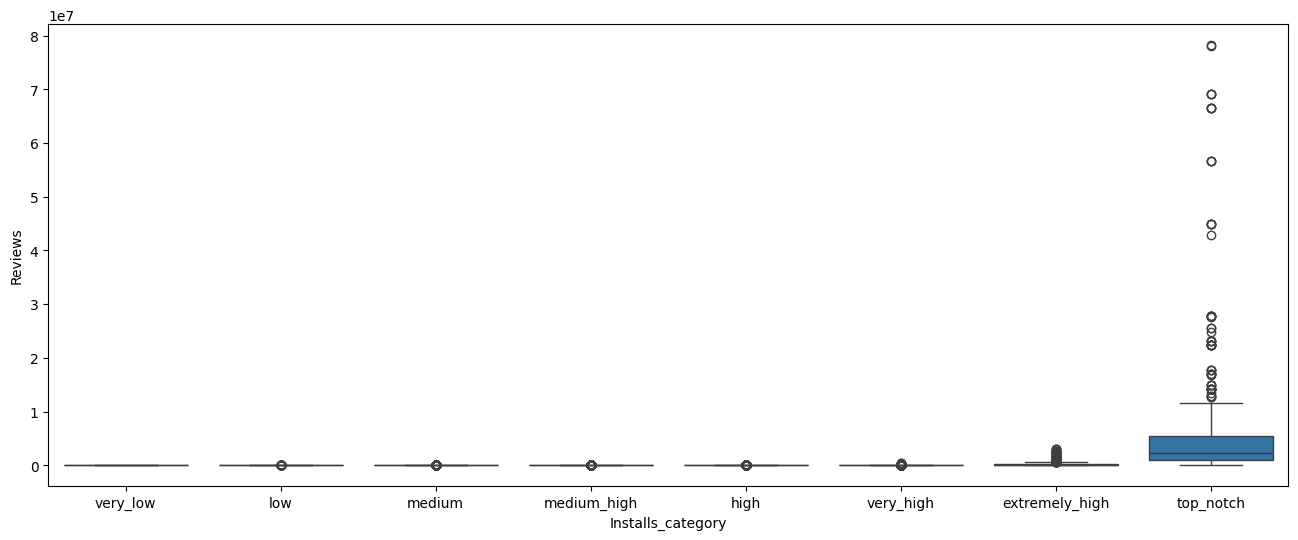

In [190]:
plt.figure(figsize= (16 , 6))
sns.boxplot(data= df , x = "Installs_category" , y = "Reviews")

- Data is not balanced here, so, we will take the log to normalize it's very large values.

<Axes: xlabel='Installs_category', ylabel='Reviews'>

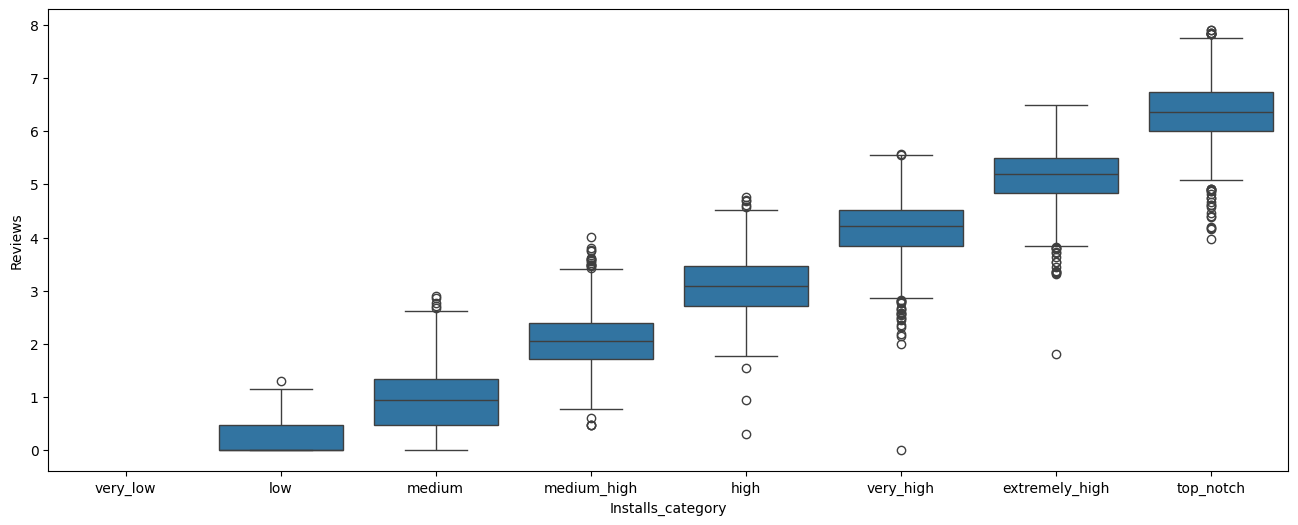

In [191]:
plt.figure(figsize= (16 , 6))

sns.boxplot(data=df , x = "Installs_category" , y = np.log10(df["Reviews"]))

- We can also draw the Scatter plot among the `Rating` , `Reviews` and the `Installs_category` column.

<Axes: xlabel='Rating', ylabel='Reviews'>

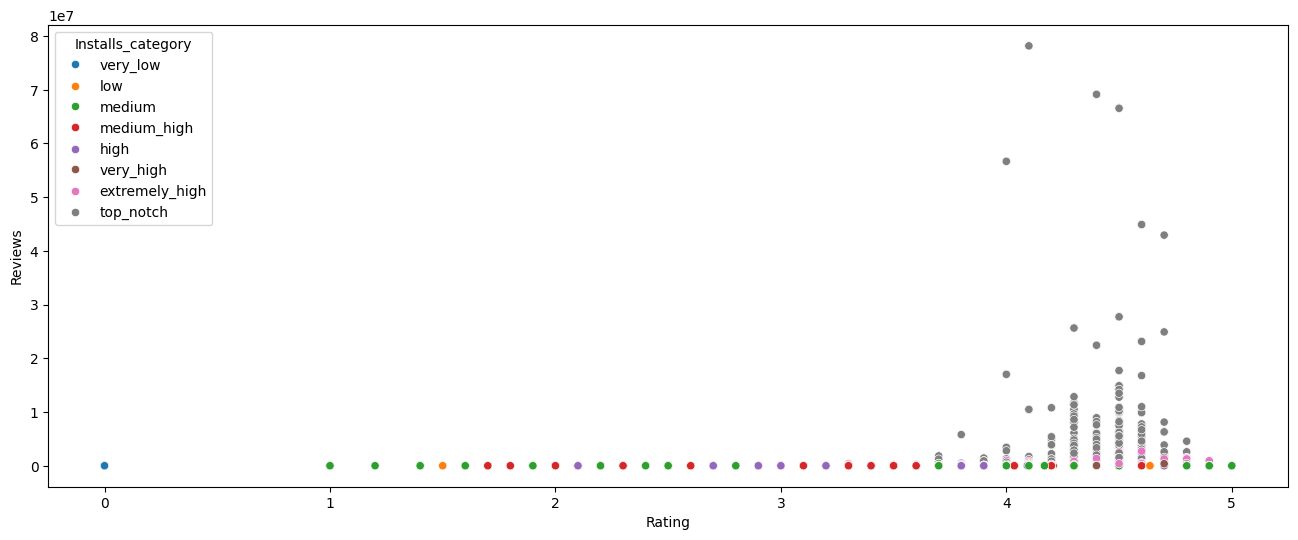

In [192]:
plt.figure(figsize= (16 , 6))

sns.scatterplot(data = df , x = "Rating" , y = "Reviews" , hue = "Installs_category")

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

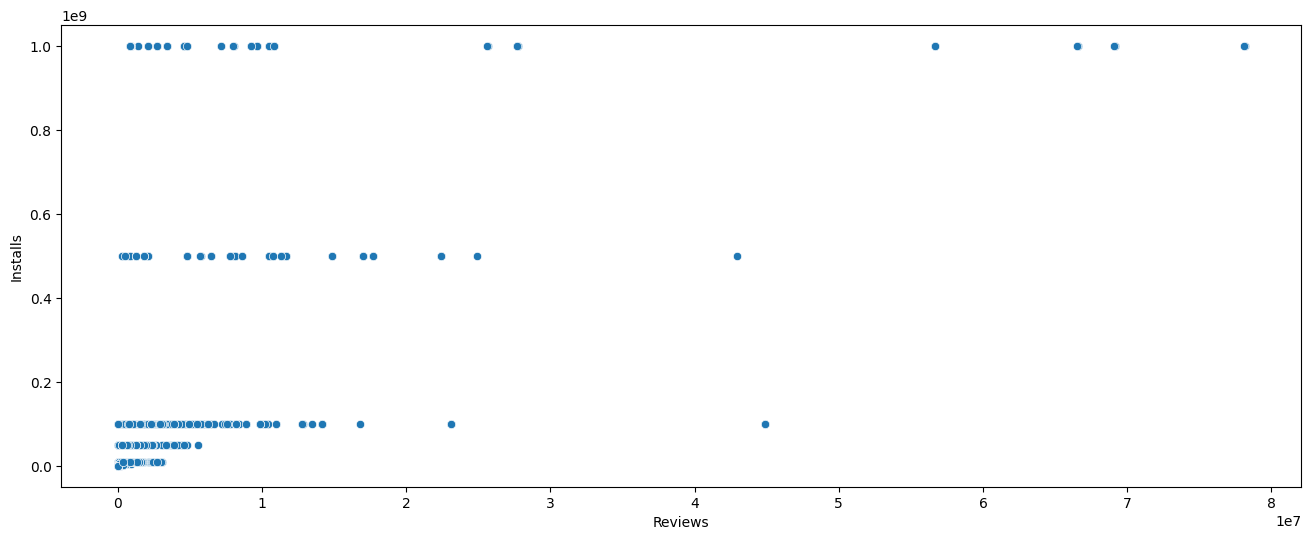

In [193]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

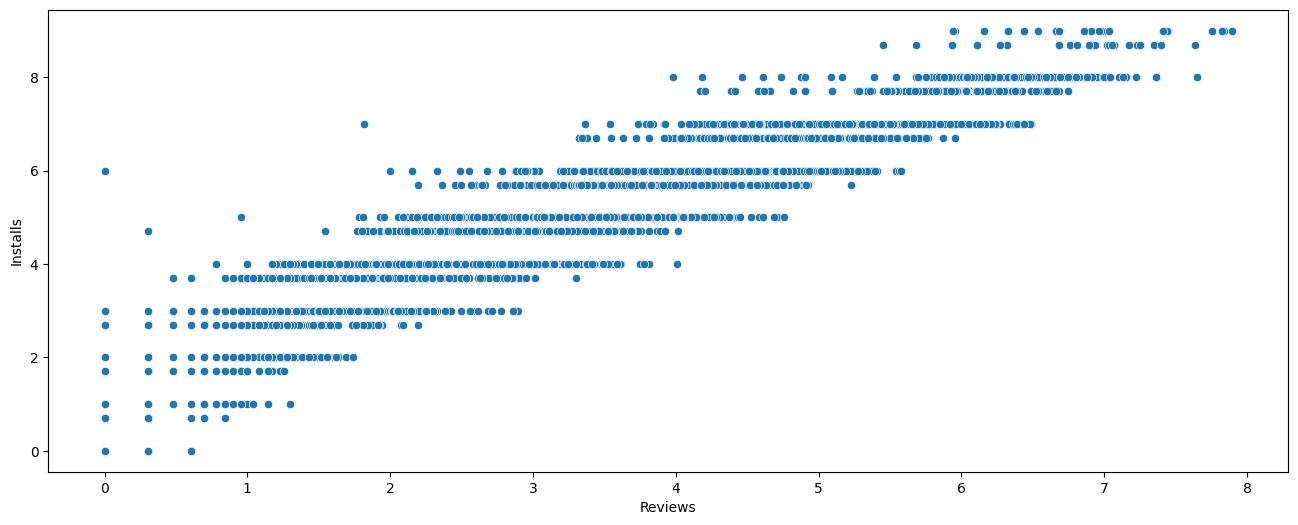

In [194]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

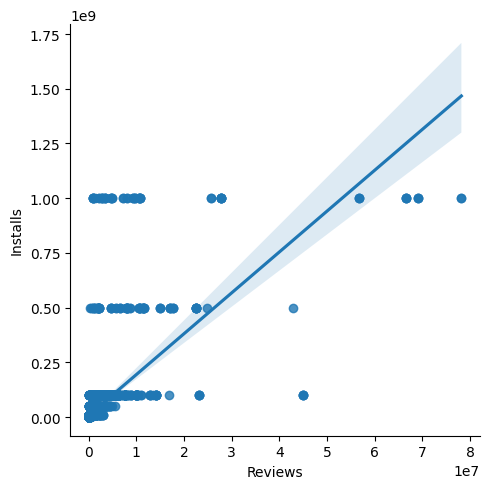

In [195]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line


- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [196]:
# find duplicate if any
df.duplicated().sum()

483

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [197]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [198]:
for col in df.columns:
    print(f"THe duplicated number of apps in the {col} are : {df['App'].duplicated().sum()} ")

THe duplicated number of apps in the App are : 1181 
THe duplicated number of apps in the Category are : 1181 
THe duplicated number of apps in the Rating are : 1181 
THe duplicated number of apps in the Reviews are : 1181 
THe duplicated number of apps in the Size_in_bytes are : 1181 
THe duplicated number of apps in the Installs are : 1181 
THe duplicated number of apps in the Type are : 1181 
THe duplicated number of apps in the Price are : 1181 
THe duplicated number of apps in the Content Rating are : 1181 
THe duplicated number of apps in the Genres are : 1181 
THe duplicated number of apps in the Last Updated are : 1181 
THe duplicated number of apps in the Current Ver are : 1181 
THe duplicated number of apps in the Android Ver are : 1181 
THe duplicated number of apps in the Size_in_Mb are : 1181 
THe duplicated number of apps in the Installs_category are : 1181 


- This means that the only better way to find duplicates is to check for whole data

In [199]:
print(f"THe total number of duplicated apps are : {df.duplicated().sum()}")

THe total number of duplicated apps are : 483


- Finding if the duplicates are real.

In [200]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,very_high
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,very_high
2543,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,very_high
2322,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,very_high
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,medium
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,medium
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,high
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,high
3083,365Scores - Live Scores,SPORTS,4.600000,666521,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,extremely_high
5415,365Scores - Live Scores,SPORTS,4.600000,666246,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,extremely_high


- Remove Duplicates

In [201]:
df.drop_duplicates(inplace= True)

In [202]:
# print the number of rows and columns after removing duplicates

print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10347


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---

## **3. Insights from Data**

## **3.1. Which category has the highest number of apps?**

In [203]:
# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

# **3.2. Which category has the highest number of installs?**

In [204]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# **3.3. Which category has the highest number of reviews?**

In [205]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# **3.4. Which category has the highest rating?**

In [206]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.394069
EDUCATION              4.373794
BOOKS_AND_REFERENCE    4.358265
PERSONALIZATION        4.321892
ART_AND_DESIGN         4.298885
GAME                   4.281875
HEALTH_AND_FITNESS     4.273739
PARENTING              4.259759
SHOPPING               4.253249
SPORTS                 4.252889
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

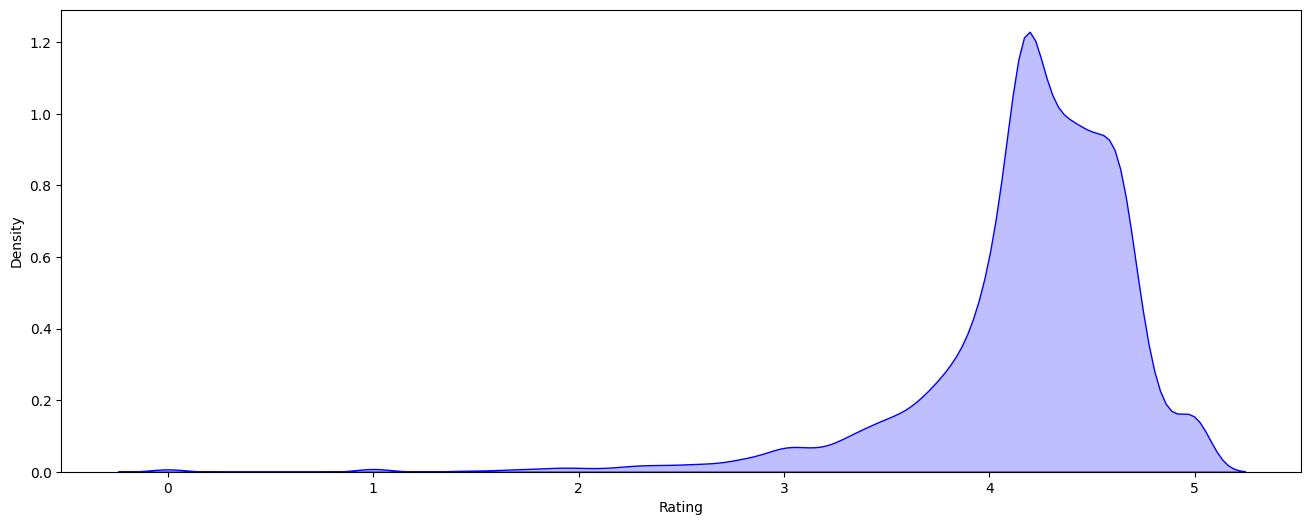

In [207]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

<Axes: xlabel='Installs', ylabel='Price'>

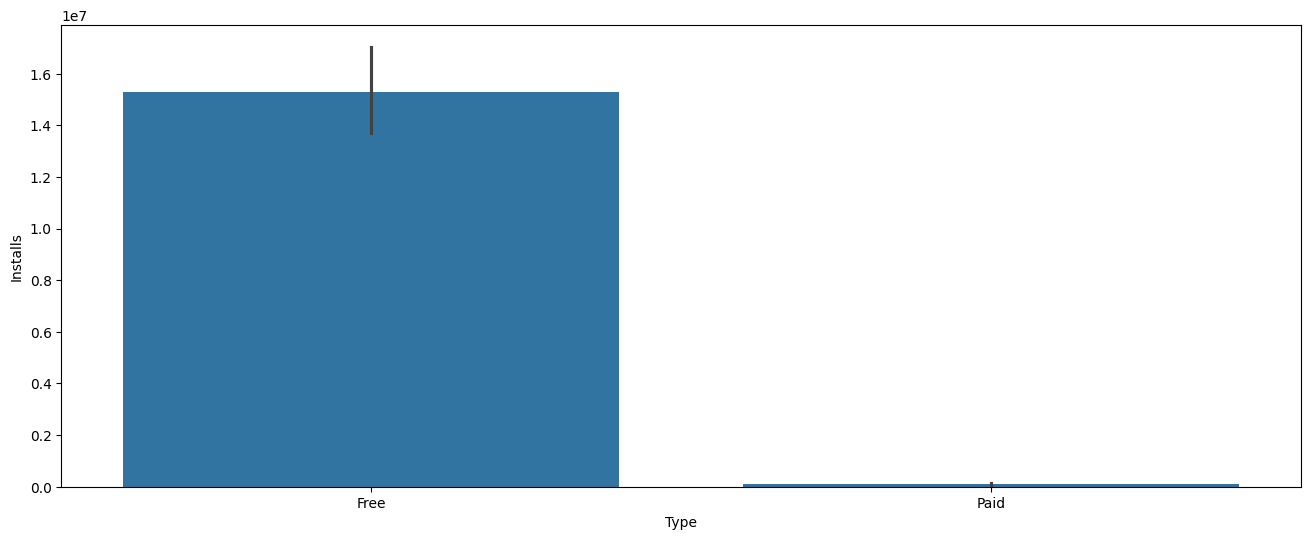

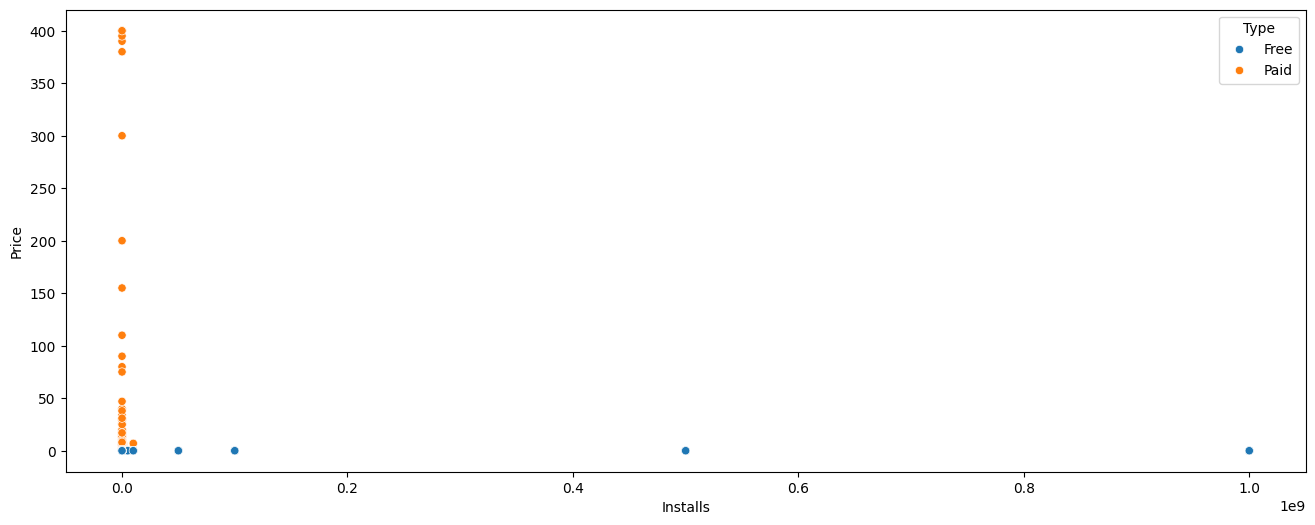

In [208]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

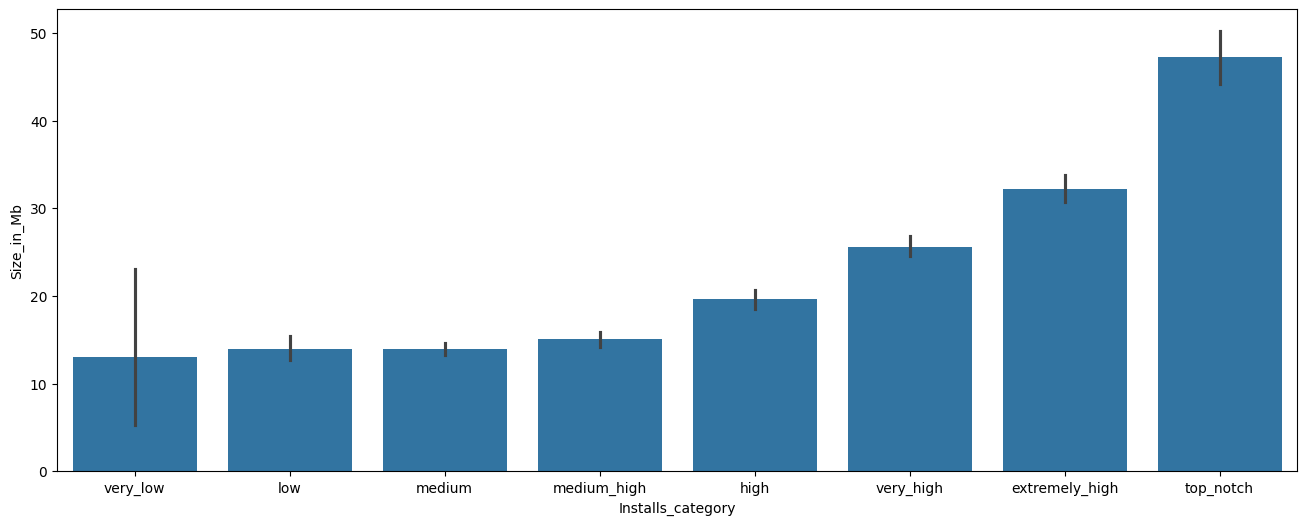

In [209]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='Size_in_Mb', data=df) # plot the bar plot

In [210]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

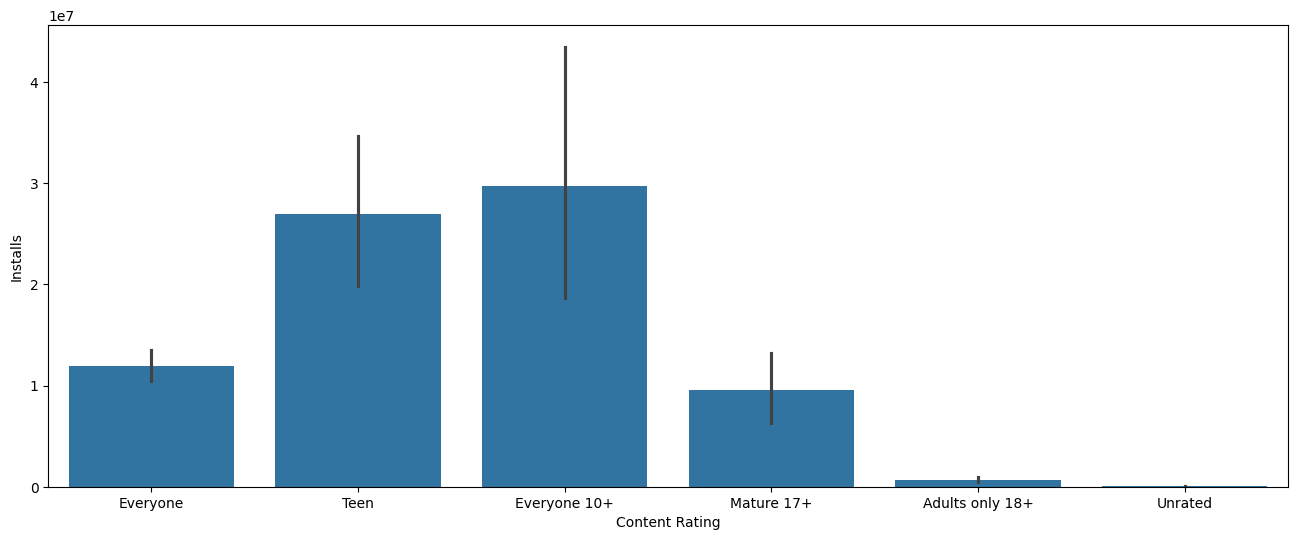

In [211]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

In [212]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

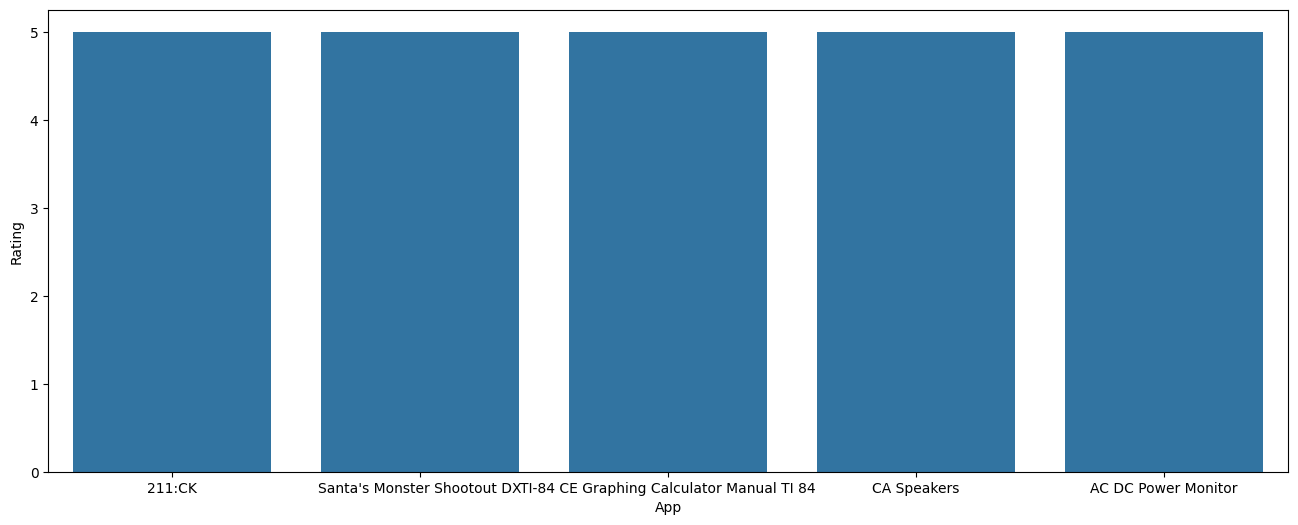

In [213]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [214]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.0,low
9056,Santa's Monster Shootout DX,GAME,5.0,4,34603008.0,50,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,33.0,medium
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,28311552.0,100,Paid,4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up,27.0,medium
7100,CA Speakers,LIFESTYLE,5.0,12,1258291.2,100,Paid,0.99,Teen,Lifestyle,"March 25, 2014",1,3.0 and up,1.2,medium
8287,AC DC Power Monitor,LIFESTYLE,5.0,1,1258291.2,10,Paid,3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2.3 and up,1.2,low


<Axes: xlabel='App', ylabel='Rating'>

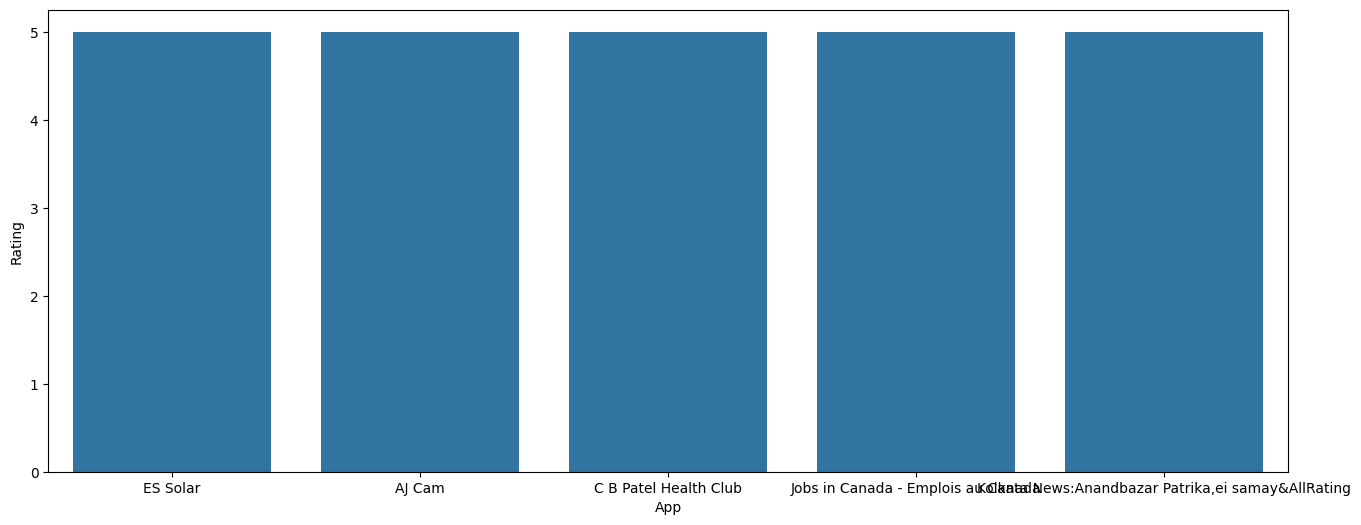

In [215]:
# plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [216]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
9815,ES Solar,BUSINESS,5.0,3,4928307.2,100,Free,0.0,Everyone,Business,"May 17, 2018",1.2,4.1 and up,4.7,medium
5230,AJ Cam,PHOTOGRAPHY,5.0,44,2936012.8,100,Free,0.0,Everyone,Photography,"January 23, 2018",1,4.1 and up,2.8,medium
7131,C B Patel Health Club,HEALTH_AND_FITNESS,5.0,5,14680064.0,100,Free,0.0,Everyone,Health & Fitness,"July 2, 2018",1.0.1,4.4 and up,14.0,medium
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2,14680064.0,1000,Free,0.0,Teen,Business,"August 5, 2018",1.1,4.2 and up,14.0,medium
9444,"Kolkata News:Anandbazar Patrika,ei samay&AllRa...",NEWS_AND_MAGAZINES,5.0,10,5242880.0,100,Free,0.0,Everyone,News & Magazines,"July 14, 2018",1,4.0.3 and up,5.0,medium


<Axes: xlabel='App', ylabel='Reviews'>

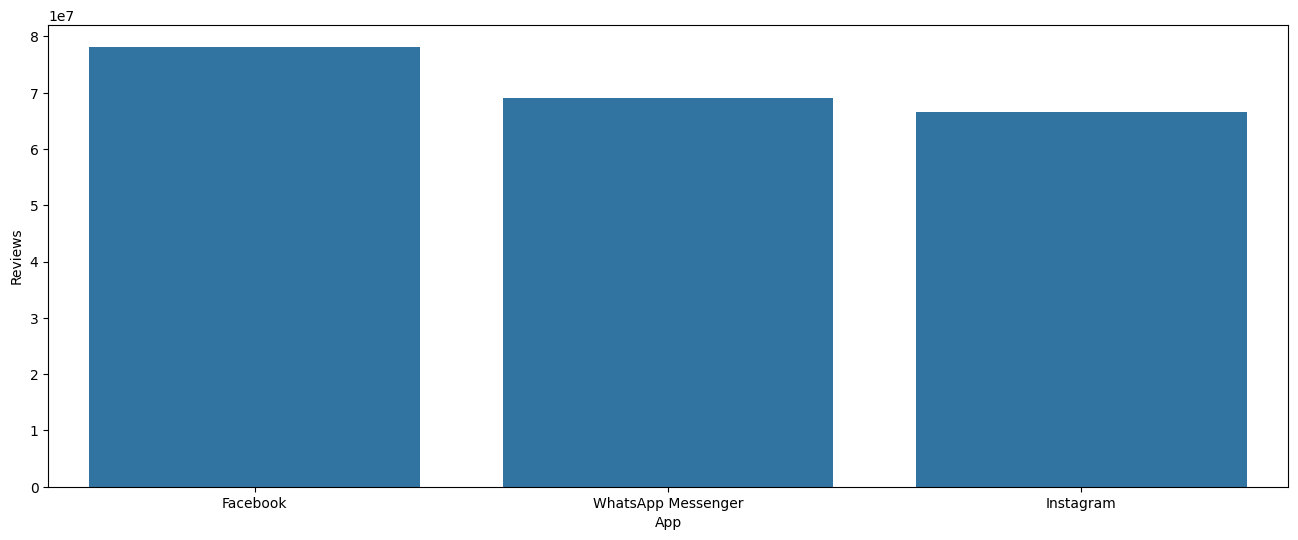

In [217]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

In [218]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,top_notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,top_notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,top_notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,top_notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,top_notch


### **Plotting the top 5 paid apps with the highest number of reviews**   

<Axes: xlabel='App', ylabel='Reviews'>

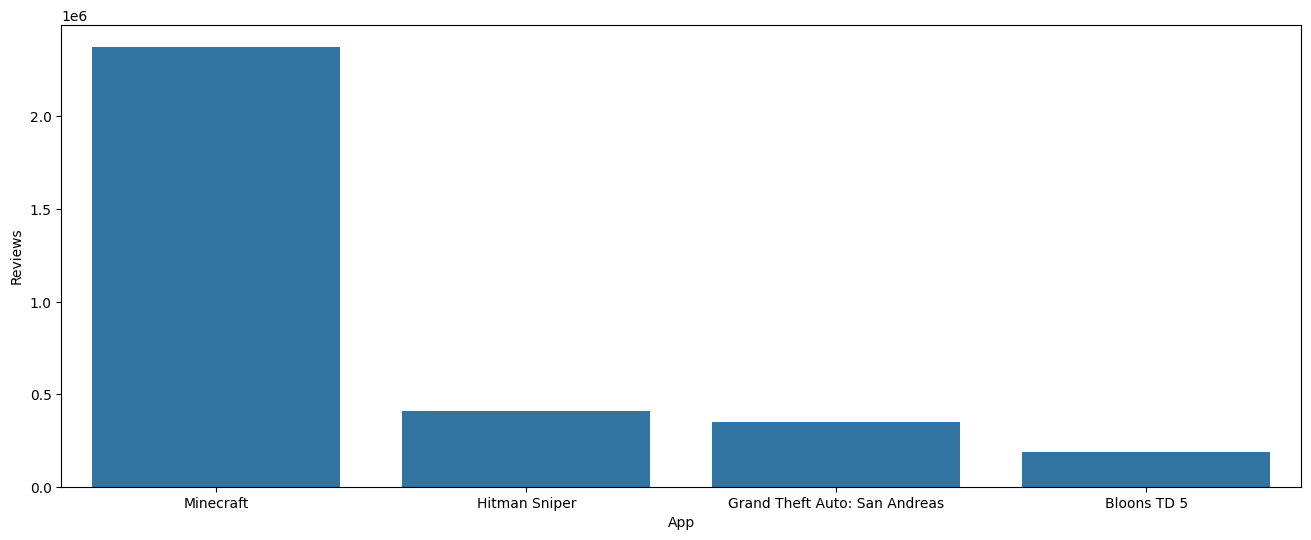

In [219]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

# **3.4. Which category Apps have the largest size in Mbs ?**

In [221]:
df.groupby("Category")["Size_in_Mb"].sum().sort_values(ascending= False).head(10)

Category
FAMILY                50420.533789
GAME                  44126.816016
MEDICAL                7365.562305
SPORTS                 7157.573633
TOOLS                  6472.346289
FINANCE                5452.991016
BUSINESS               5272.850977
HEALTH_AND_FITNESS     5194.276563
LIFESTYLE              5021.468359
TRAVEL_AND_LOCAL       4388.356836
Name: Size_in_Mb, dtype: float64

# **3.5.Which `Genres` of the app have how much mean `Rating` ?**

In [222]:
df.groupby("Genres")["Rating" ].mean().sort_values(ascending= False).head(10)

Genres
Comics;Creativity              4.800000
Board;Pretend Play             4.800000
Health & Fitness;Education     4.700000
Strategy;Action & Adventure    4.600000
Adventure;Brain Games          4.600000
Puzzle;Education               4.600000
Entertainment;Creativity       4.533333
Music;Music & Video            4.533333
Racing;Pretend Play            4.500000
Tools;Education                4.500000
Name: Rating, dtype: float64

# **3.6. WHich `Genres` has how much mean `Price` ?**

In [223]:
df.groupby("Genres")["Price"].mean().sort_values(ascending= False).head(10)

Genres
Finance                         8.057861
Lifestyle                       6.346425
Adventure;Brain Games           2.990000
Books & Reference;Creativity    2.990000
Entertainment                   2.836593
Simulation;Education            2.660000
Medical                         2.501691
Role Playing;Education          2.490000
Education;Pretend Play          2.437222
Sports;Action & Adventure       1.995000
Name: Price, dtype: float64

# **3.7. WHich `Genres` have how much `Installs` ?**

In [224]:
df.groupby("Genres")["Installs"].sum().sort_values(ascending= False).head(10)

Genres
Communication              24152276251
Social                     12513867902
Productivity               12463091369
Tools                      11442271905
Photography                 9721247655
Arcade                      9717129155
Casual                      8662830740
Action                      8336039190
Travel & Local              6361787146
Video Players & Editors     6207002720
Name: Installs, dtype: int64

# **3.8. Which `Type` (Free or paid) of App have maximum number of `Installs` ?**

In [225]:
df.groupby("Type")["Installs"].sum().sort_values(ascending= False)


Type
Free    146561163546
Paid        69174871
Name: Installs, dtype: int64

# **3.9. Which `Price` of Apps have maximum number of `Installs` ?**

In [226]:
df.groupby("Price")["Installs"].sum().sort_values(ascending= False).head(10)


Price
0.00    146561163546
6.99        21133100
0.99        20337363
2.99        10290022
1.99         4001131
4.99         3434680
5.99         2774912
3.99         2169251
2.49         1738831
9.99          484600
Name: Installs, dtype: int64

# **3.10. Which `Apps` have maximum number of `Installs` ?**

In [227]:
df.groupby("App")["Installs"].sum().sort_values(ascending= False).head(10)


App
Subway Surfers                  5000000000
Hangouts                        4000000000
Google Photos                   4000000000
Google Chrome: Fast & Secure    3000000000
Google Drive                    3000000000
Instagram                       3000000000
Maps - Navigate & Explore       3000000000
Google News                     3000000000
Temple Run 2                    2500000000
Candy Crush Saga                2500000000
Name: Installs, dtype: int64

# **3.11. Which `category` has the maximun Pricing ?**

In [232]:
df.groupby("Category")["Price"].mean().sort_values(ascending= False).head(10)


Category
FINANCE                8.057861
LIFESTYLE              6.329410
MEDICAL                2.501691
EVENTS                 1.718594
FAMILY                 1.247978
PRODUCTIVITY           0.616536
BOOKS_AND_REFERENCE    0.523013
BUSINESS               0.410515
WEATHER                0.395366
PERSONALIZATION        0.388549
Name: Price, dtype: float64

# **3.12. Which `Genres` have how much apps with the `Content Rating` of Everyone?**

In [235]:
df["Genres"].loc[df["Content Rating"] == "Everyone"].value_counts()

Genres
Tools                                    832
Education                                496
Business                                 412
Productivity                             396
Medical                                  390
Entertainment                            377
Finance                                  355
Lifestyle                                336
Sports                                   330
Communication                            325
Personalization                          318
Photography                              307
Health & Fitness                         275
Travel & Local                           229
Books & Reference                        200
Shopping                                 183
News & Magazines                         168
Casual                                   154
Arcade                                   151
Video Players & Editors                  145
Simulation                               135
Maps & Navigation                        133
Puz

# **3.13. Which `Genres` have how much apps with the `Content Rating` of Teen?**

In [237]:
df["Genres"].loc[df["Content Rating"] == "Teen"].value_counts()

Genres
Entertainment              162
Action                     160
Social                     121
Personalization             54
Role Playing                48
Simulation                  40
Shopping                    38
Casino                      36
Strategy                    33
Adventure                   32
Arcade                      32
News & Magazines            32
Communication               31
Casual                      24
Video Players & Editors     24
Card                        24
Lifestyle                   22
Comics                      22
Books & Reference           21
Health & Fitness            19
Puzzle                      17
Education                   15
Sports                      14
Business                    13
Educational                 13
Photography                 11
Dating                      10
Productivity                 9
Food & Drink                 8
Events                       8
Racing                       7
Travel & Local               6
T

In [238]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,medium_high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,very_high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,extremely_high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,top_notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,high


# **3.14. How many apps of type `Free` have the rating greater than `4` ?**

In [242]:
(df['Rating'] > 4).loc[df['Type'] == "Free"].value_counts()

Rating
True     7236
False    2349
Name: count, dtype: int64

# **3.15. How many apps of which `category` has the `Rating` greater than 4.5?**

In [243]:
(df['Category']).loc[df['Rating'] > 4.5].value_counts()

Category
FAMILY                 421
GAME                   217
TOOLS                  147
MEDICAL                121
BUSINESS               118
HEALTH_AND_FITNESS     113
PERSONALIZATION        109
LIFESTYLE              104
PRODUCTIVITY            98
BOOKS_AND_REFERENCE     92
SPORTS                  90
FINANCE                 80
SOCIAL                  61
NEWS_AND_MAGAZINES      52
PHOTOGRAPHY             46
COMMUNICATION           44
SHOPPING                44
EDUCATION               38
DATING                  33
TRAVEL_AND_LOCAL        31
FOOD_AND_DRINK          31
AUTO_AND_VEHICLES       29
EVENTS                  25
VIDEO_PLAYERS           24
ART_AND_DESIGN          22
PARENTING               19
MAPS_AND_NAVIGATION     16
COMICS                  13
LIBRARIES_AND_DEMO      11
HOUSE_AND_HOME          11
WEATHER                 11
BEAUTY                  11
ENTERTAINMENT            8
Name: count, dtype: int64